<a href="https://colab.research.google.com/github/nagaforjesus/python-projects/blob/main/ComplexData_Machine_Learning_Model_Training_fafsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd


In [12]:
# starting with loading the data from CSV files into pandas dataframes
student_demographics = pd.read_csv('student_demographics.csv')
fafsa_application = pd.read_csv('fafsa_application.csv')
financial_aid_disbursement = pd.read_csv('financial_aid_disbursement.csv')
student_enrollment_performance = pd.read_csv('student_enrollment_performance.csv')



In [13]:
# Display the first few rows of each dataframe
print(student_demographics.head())
print(fafsa_application.head())
print(financial_aid_disbursement.head())
print(student_enrollment_performance.head())

   student_id  age  gender  household_income parent_education_level state
0           1   18  Female             35000            High School    TX
1           2   19    Male             70000      Bachelor’s Degree    CA
2           3   17  Female             45000     Associate’s Degree    NY
3           4   20    Male            100000        Master’s Degree    FL
4           5   18  Female             25000            High School    TX
   fafsa_id  student_id fafsa_submission_date fafsa_status  \
0      1001           1               1/15/24     Approved   
1      1002           2               2/10/24       Denied   
2      1003           3               1/30/24     Approved   
3      1004           4                3/5/24     Approved   
4      1005           5               2/15/24      Pending   

   efc (expected_family_contribution) loan_requested  pell_grant_awarded  
0                                5000            Yes                2500  
1                               1

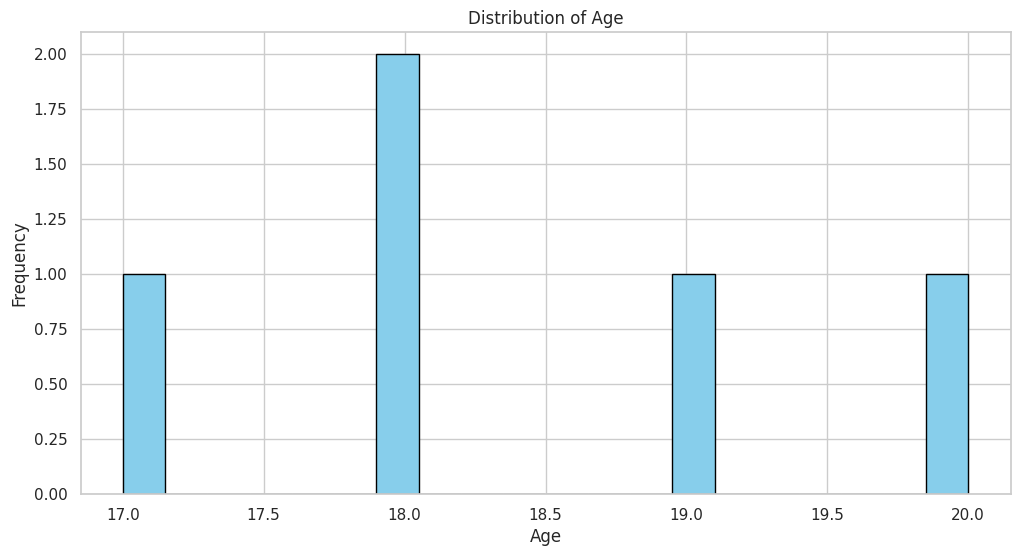

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plotting style for visualizations
sns.set(style='whitegrid')

# Plotting histograms for a few numerical columns from student demographics
plt.figure(figsize=(12, 6))
student_demographics['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-74-074fef8b1edb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_demographics, x='parent_education_level', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: Whe

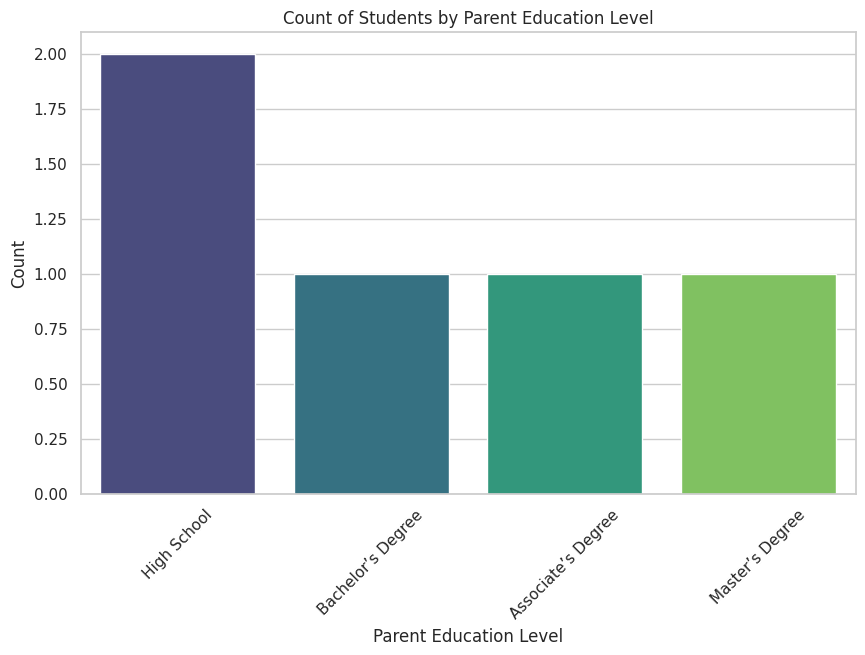

In [74]:
# Count plot for parent education level
plt.figure(figsize=(10, 6))
sns.countplot(data=student_demographics, x='parent_education_level', palette='viridis')
plt.title('Count of Students by Parent Education Level')
plt.xticks(rotation=45)
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.show()


In [14]:
#In the chapter merging data's

# Merge the tables on 'student_id'
merged_data = pd.merge(student_demographics, fafsa_application, on='student_id', how='inner')
merged_data = pd.merge(merged_data, financial_aid_disbursement, on='student_id', how='inner')
merged_data = pd.merge(merged_data, student_enrollment_performance, on='student_id', how='inner')

# Display the merged data
print(merged_data.head())


   student_id  age  gender  household_income parent_education_level state  \
0           1   18  Female             35000            High School    TX   
1           2   19    Male             70000      Bachelor’s Degree    CA   
2           3   17  Female             45000     Associate’s Degree    NY   
3           4   20    Male            100000        Master’s Degree    FL   
4           5   18  Female             25000            High School    TX   

   fafsa_id fafsa_submission_date fafsa_status  \
0      1001               1/15/24     Approved   
1      1002               2/10/24       Denied   
2      1003               1/30/24     Approved   
3      1004                3/5/24     Approved   
4      1005               2/15/24      Pending   

   efc (expected_family_contribution)  ... pell_grant_dispersed  \
0                                5000  ...                 2500   
1                               12000  ...                    0   
2                                20

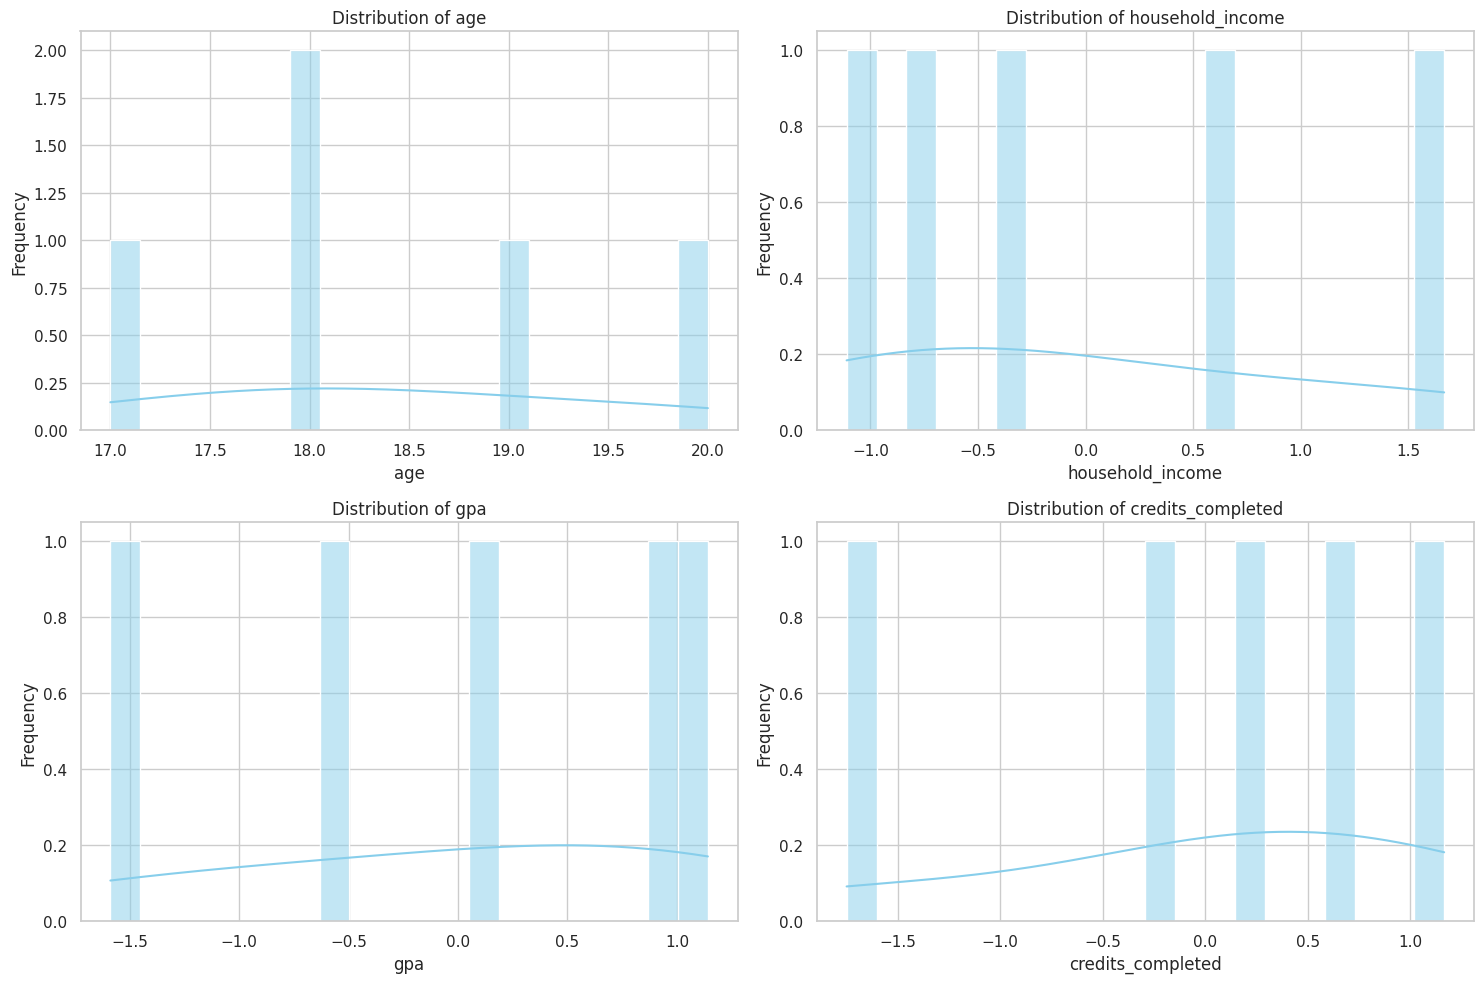

In [77]:
#Visualization

sns.set(style='whitegrid')

# Plot histograms for a few numerical columns
numerical_columns = ['age', 'household_income', 'gpa', 'credits_completed']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(merged_data[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-76-6d2eaf1c38fa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='enrollment_status', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wit

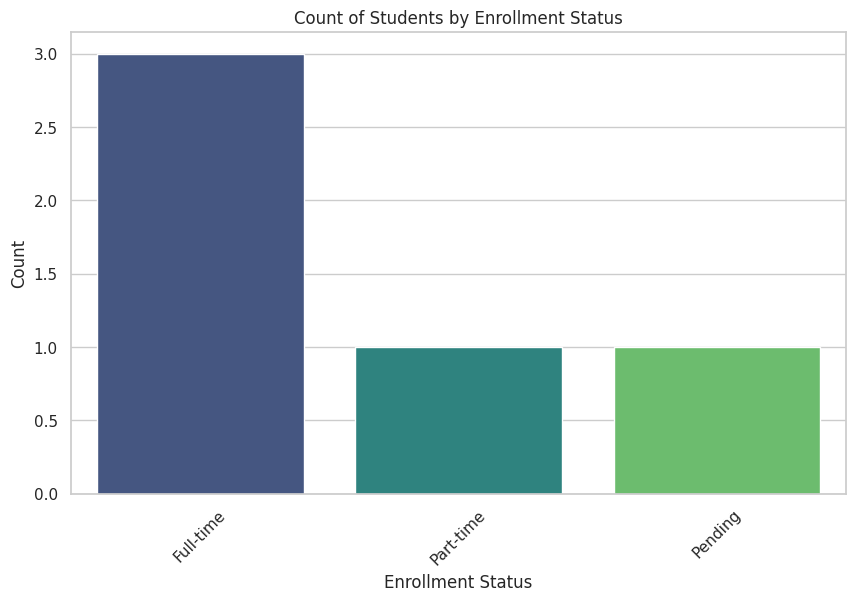

In [76]:
# Count plot for enrollment status
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='enrollment_status', palette='viridis')
plt.title('Count of Students by Enrollment Status')
plt.xlabel('Enrollment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [21]:

from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with median
numeric_cols = ['household_income', 'efc (expected_family_contribution)', 'gpa', 'credits_completed']
imputer_num = SimpleImputer(strategy='median')
merged_data[numeric_cols] = imputer_num.fit_transform(merged_data[numeric_cols])

# Fill missing values for categorical columns with most frequent value
categorical_cols = ['gender', 'state', 'graduation_status']
imputer_cat = SimpleImputer(strategy='most_frequent')
merged_data[categorical_cols] = imputer_cat.fit_transform(merged_data[categorical_cols])


In [19]:
for col in numeric_cols:
    print(f"Unique values in {col}: {merged_data[col].unique()}")


Unique values in household_income: [ 35000  70000  45000 100000  25000]
Unique values in efc (expected_family_contribution): [ 5000 12000  2000 15000     0]
Unique values in gpa: ['3.8' '3.2' '3.9' '2.8' '-']
Unique values in credits_completed: ['60' '45' '30' '55' '-']


In [20]:
import numpy as np

merged_data[numeric_cols] = merged_data[numeric_cols].replace('-', np.nan)


In [22]:
merged_data[numeric_cols] = merged_data[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [23]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
merged_data[numeric_cols] = imputer_num.fit_transform(merged_data[numeric_cols])


In [24]:
print(merged_data[numeric_cols].isnull().sum())


household_income                      0
efc (expected_family_contribution)    0
gpa                                   0
credits_completed                     0
dtype: int64


In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')


In [30]:
encoded_cols = encoder.fit_transform(merged_data[['gender', 'state', 'graduation_status']])


In [33]:
# Convert to dataframe and add it back to the merged data
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['gender', 'state', 'graduation_status']))
merged_data = pd.concat([merged_data, encoded_df], axis=1)

In [34]:
# Drop the original categorical columns
merged_data.drop(['gender', 'state', 'graduation_status'], axis=1, inplace=True)

In [35]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns
scaler = StandardScaler()
merged_data[numeric_cols] = scaler.fit_transform(merged_data[numeric_cols])


In [42]:
# Define features and target
features = ['age', 'household_income', 'loan_requested', 'pell_grant_awarded', 'gpa']  # Add more features as needed
X = merged_data[features]
y = merged_data['fafsa_status']  # Target variable for prediction

# Convert the target to binary (1 = Approved, 0 = Denied/Pending)
y = y.apply(lambda x: 1 if x == 'Approved' else 0)


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [49]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Optionally, display the first few rows of the training set
import pandas as pd

if isinstance(X, pd.DataFrame):
    display(X_train.head())
else:
    print("X_train:", X_train[:5])  # Display first 5 rows if X is not a DataFrame


Training set shape: (3, 5)
Testing set shape: (2, 5)
Training labels shape: (3,)
Testing labels shape: (2,)


,age,household_income,loan_requested,pell_grant_awarded,gpa
2,17,-0.370117,Yes,3500,1.141471
0,18,-0.740233,Yes,2500,0.893325
3,20,1.665525,Yes,0,-1.588133


<ipython-input-79-77411c2dfaac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


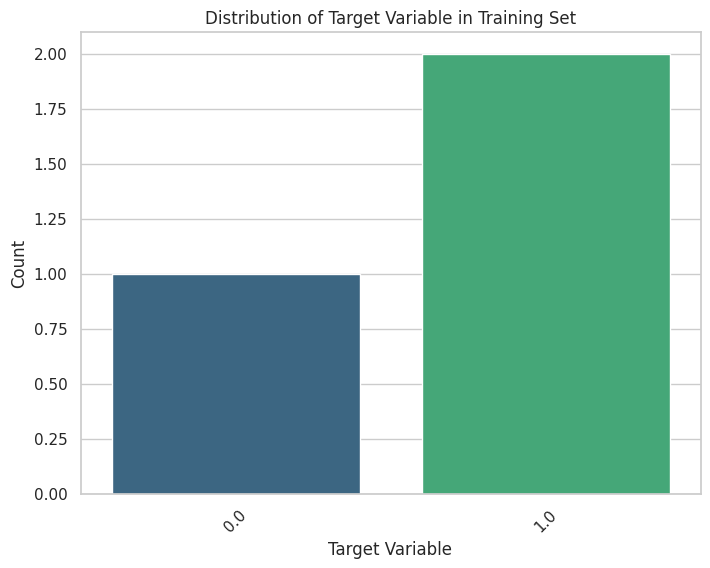

In [79]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

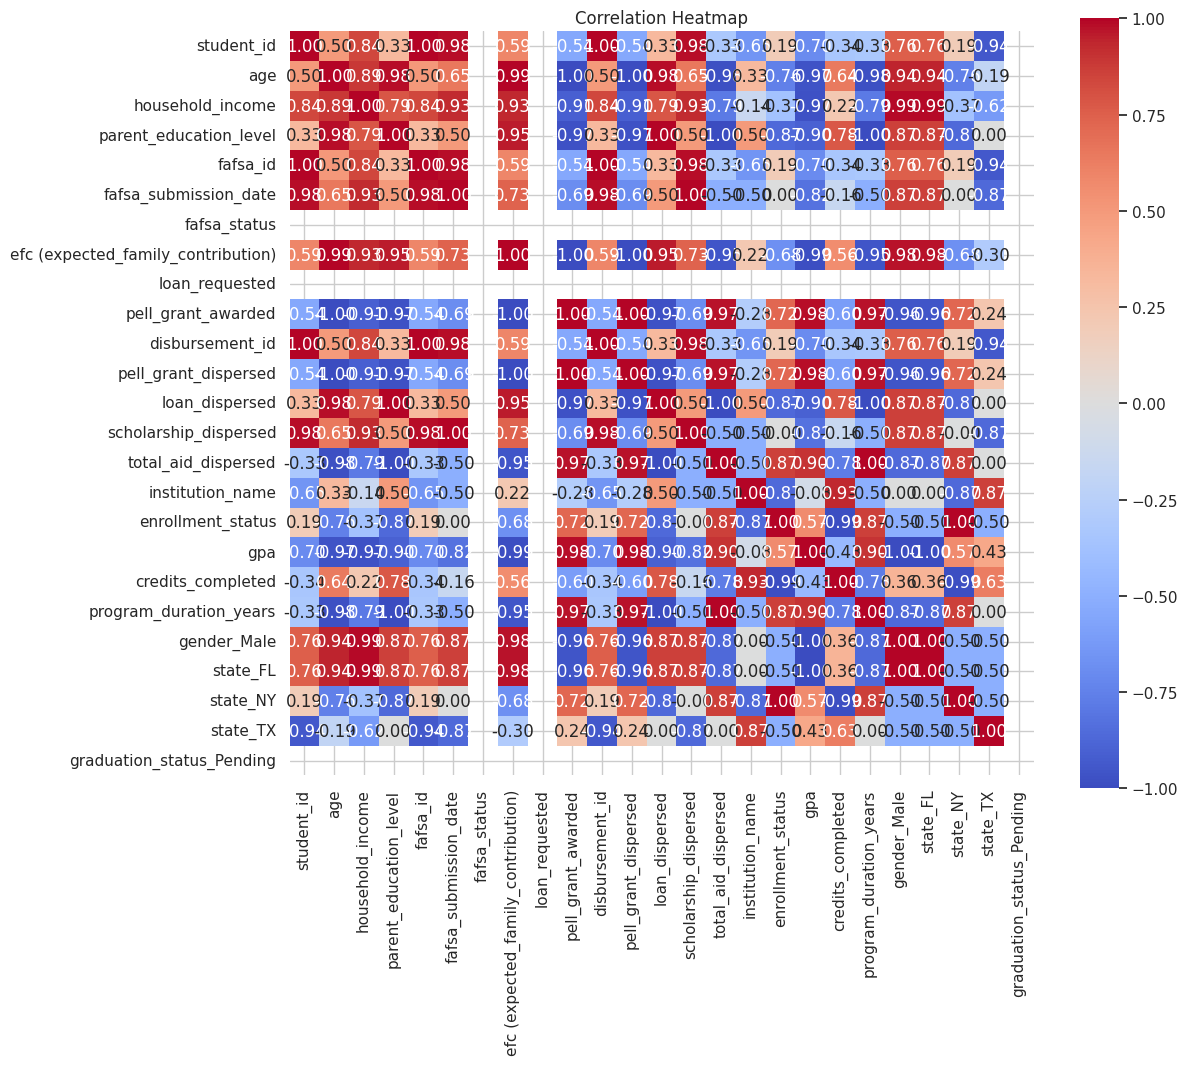

In [81]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

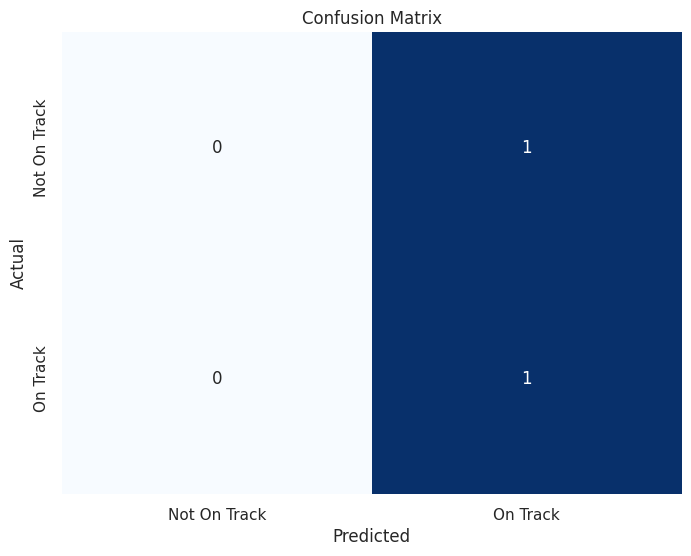

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not On Track', 'On Track'],
            yticklabels=['Not On Track', 'On Track'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

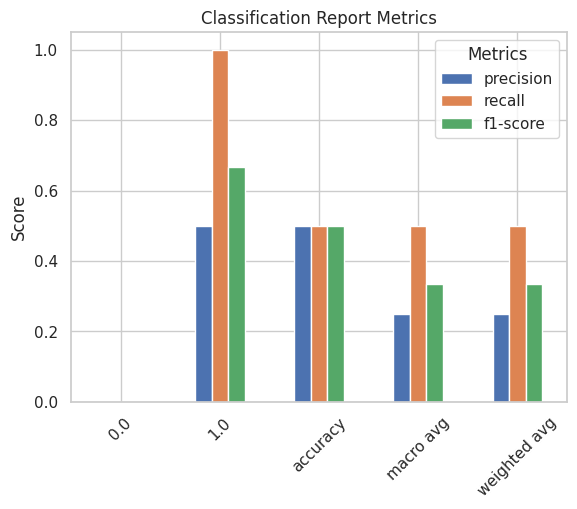

In [83]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")

# Precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


Confusion Matrix:
 [[0 2]
 [0 0]]
Precision: 0.0, Recall: 0.0, F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[0 1]
 [0 1]]
Precision: 0.5, Recall: 1.0, F1-Score: 0.6666666666666666


<ipython-input-91-5f4a7fd620bd>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metrics', y='Score', data=metrics, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

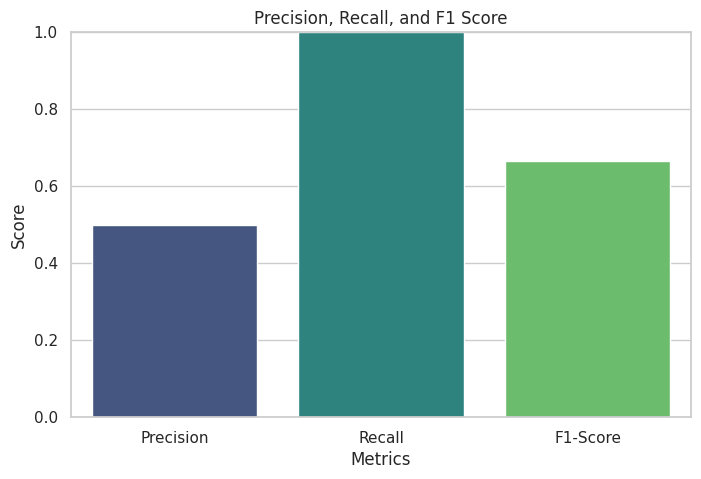

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


# Create  DataFrame for metrics
metrics = pd.DataFrame({
    'Metrics': ['Precision', 'Recall', 'F1-Score'],
    'Score': [precision, recall, f1]
})

# Plot metrics
plt.figure(figsize=(8, 5))
sns.barplot(x='Metrics', y='Score', data=metrics, palette='viridis')
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()


In [64]:
display(merged_data.head())


,student_id,age,household_income,parent_education_level,fafsa_id,fafsa_submission_date,fafsa_status,efc (expected_family_contribution),loan_requested,pell_grant_awarded,...,enrollment_status,gpa,credits_completed,program_duration_years,gender_Male,state_FL,state_NY,state_TX,graduation_status_On Track,graduation_status_Pending
0,1,18.0,-0.740233,High School,1001,1/15/24,Approved,-0.311645,Yes,2500.0,...,Full-time,0.893325,1.165543,4,0.0,0.0,0.0,1.0,1.0,0.0
1,2,19.0,0.555175,Bachelor’s Degree,1002,2/10/24,Denied,0.900306,No,0.0,...,Full-time,-0.595550,-0.291386,3,1.0,0.0,0.0,0.0,1.0,0.0
2,3,17.0,-0.370117,Associate’s Degree,1003,1/30/24,Approved,-0.831052,Yes,3500.0,...,Part-time,1.141471,-1.748315,4.5,0.0,0.0,1.0,0.0,0.0,0.0
3,4,20.0,1.665525,Master’s Degree,1004,3/5/24,Approved,1.419714,Yes,0.0,...,Full-time,-1.588133,0.679900,3.5,1.0,1.0,0.0,0.0,1.0,0.0
4,5,18.0,-1.110350,High School,1005,2/15/24,Pending,-1.177324,Yes,6000.0,...,Pending,0.148888,0.194257,-,0.0,0.0,0.0,1.0,0.0,1.0


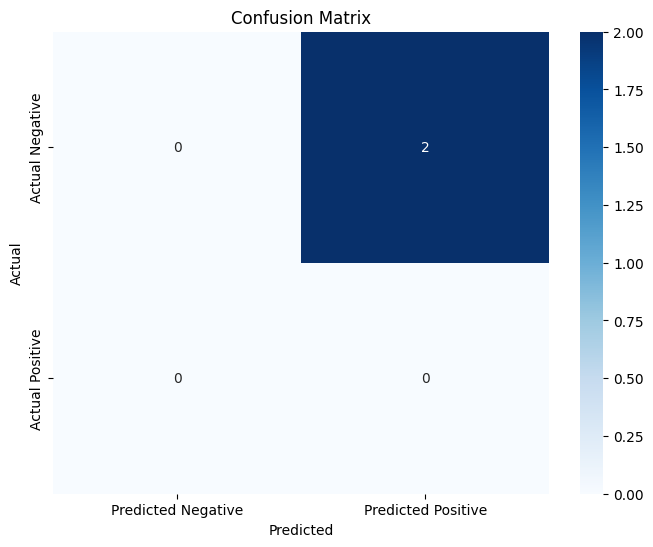

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-95-d7aa23cbec54>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

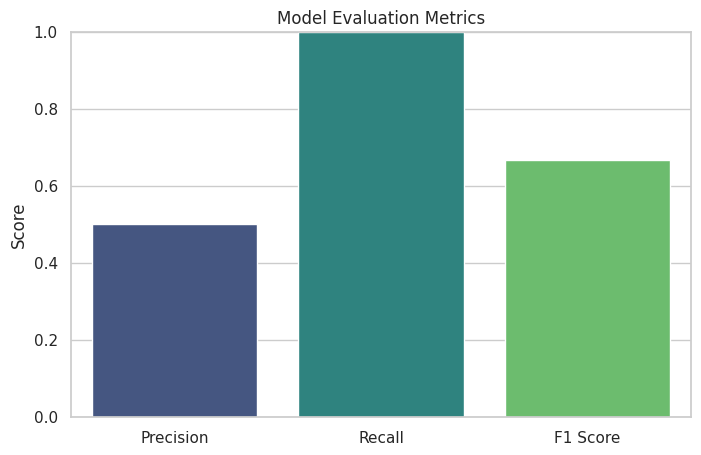

In [95]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()